In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
with (open("chgk/results.pkl", "rb")) as openfile:
    results = pickle.load(openfile)
with (open("chgk/tournaments.pkl", "rb")) as openfile:
    tournaments = pickle.load(openfile)
with (open("chgk/players.pkl", "rb")) as openfile:
    players = pickle.load(openfile)

In [3]:
train_tournaments = {}
test_tournaments = {}
for key, value in tournaments.items():
    if len(results[key]) and 'mask' in results[key][0]:
        if results[key][0]['mask'] != None: 
            if int(value['dateStart'].split('-')[0]) == 2019:
                train_tournaments[key] = value
            if int(value['dateStart'].split('-')[0]) == 2020:
                test_tournaments[key] = value

Считаем веса вопросов

In [4]:
weights = {}
for idx, data in train_tournaments.items():
    totalQs = np.sum(list(data['questionQty'].values()))
    masks = []
    for team in results[idx]:
        if team['mask'] and len(team['mask']) == totalQs and 'X' not in team['mask'] and '?' not in team['mask']:
            masks.append(list(map(int, team['mask'])))
    weights[idx] = 1 - np.mean(masks, axis=0)   
    

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Создаем таблицу игроков и вопросов

In [5]:
df = []
for idx, data in train_tournaments.items():
    totalQs = np.sum(list(data['questionQty'].values()))
    
    for team in results[idx]:
        if team['mask'] and len(team['mask']) == totalQs and 'X' not in team['mask'] and '?' not in team['mask']:
            mask = list(map(int, team['mask']))
            for member in team["teamMembers"]:
                for iq in range(totalQs):
                    df.append((member["player"]["id"],
                               weights[idx][iq],
                               mask[iq],
                               f"{idx}_"+str(iq),
                               team['team']['id'],
                               idx)) 
df = pd.DataFrame(df, columns=["player", "difficult", "answer", "question_id", "team_id", "tournament_id"])

In [6]:
df.head()


,player,difficult,answer,question_id,team_id,tournament_id
0,6212,0.116883,1,4772_0,45556,4772
1,6212,0.220779,1,4772_1,45556,4772
2,6212,0.554113,1,4772_2,45556,4772
3,6212,0.480519,1,4772_3,45556,4772
4,6212,0.121212,1,4772_4,45556,4772


## 2 часть

Плотность распределения сложности вопрсоов

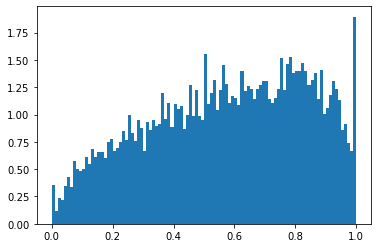

In [7]:
import matplotlib.pyplot as plt
nbins = 100
density = plt.hist(df["difficult"], bins=nbins, density=True)[0]

Вычислим силу игрока как матожидание его предсказанной силы на вопросах всех сложностей

In [8]:
# from sklearn.linear_model import LogisticRegression
# player_rating = {}
# all_players = df["player"].unique()
# model = LogisticRegression(C=100, solver="lbfgs")
# for player in all_players:
#     train = df[df["player"]==player]
#     data_X = train[["difficult"]]
#     data_y = train["answer"]
#     if np.unique(data_y).shape[0] > 1:
#         model.fit(data_X, data_y)
#         predict = model.predict_proba(np.arange(0, 1, 0.01).reshape(-1, 1))[:, 1]
#         rating = predict @ density / nbins # 0,01 - это шаг гистограммы
#     else:
#         rating = data_y.values[0]
#     player_rating[player] = rating

In [9]:
# if don't want to wait , just load from file
# np.save("dataset.npy", player_rating)
player_rating = np.load("dataset.npy", allow_pickle=True).tolist()

In [10]:
avg = np.mean(list(player_rating.values()))

In [11]:
df['player_rating'] = df['player'].apply(lambda x: player_rating[x])

In [12]:
df.head()

,player,difficult,answer,question_id,team_id,tournament_id,player_rating
0,6212,0.116883,1,4772_0,45556,4772,0.70718
1,6212,0.220779,1,4772_1,45556,4772,0.70718
2,6212,0.554113,1,4772_2,45556,4772,0.70718
3,6212,0.480519,1,4772_3,45556,4772,0.70718
4,6212,0.121212,1,4772_4,45556,4772,0.70718


In [13]:
ordered = dict(sorted(player_rating.items(), key=lambda item: -item[1]))

def id2name(idx):
    return players[idx]["name"] + " " + players[idx]["surname"]

for i in range(50):
    print(id2name(list(ordered.keys())[i]))

София Лебедева
Давид Кан
Михаил Завьялов
София Савенко
Алексей Антонов
Александр Корнюков
Полина Джегур
Елизавета Коваленко
Арина Гринко
Юлия Крюкова
Наталья Артемьева
Екатерина Горелова
Глеб Гаврилов
Семён Зайдельман
Дамир Тужушев
Алибек Аубакиров
Никита Романов
Александр Полторак
Никита Панфилов
Вячеслав Маслянко
Вадим Солодовников
Артём Захаров
Оксана Черенкова
Андрей Козенко
Дмитрий Вальтер
Валентина Подюкова
Елизавета Шкеда
Лидия Подшивайлова
Оганес Саакян
Сабит Мамбетов
Семён Кохоновер
Ольга Кинзерская
Илья Микулин
Василий Погребной
Константин Каволин
Мария Маторная
Елена Бровченко
Иван Катруха
Дмитрий Кудинов
Светлана Обогрелова
Максим Руссо
Данута Дембовская
Максим Ребров
Лейсан Ибнеева
Михаил Вантеев
Елизавета Корначёва
Александр Ковалевич
Константин Шаталин
Егор Лобынцев
Серафим Рылов


## 3 часть

In [14]:
def team_power(team):
    mates = [mate["player"]["id"] for mate in team]
    result = 1
    for mate in mates:
        sub = avg
        if mate in player_rating.keys():
            sub = player_rating[mate]
        result = result * (1 - sub)
    result = 1 - result
    return result

In [15]:
from scipy.stats import spearmanr, kendalltau


spearman = []
kendall = []
for tournament in test_tournaments:
    actual = []
    predicted = []
    for team in results[tournament]:
        if 'position' in team and \
        'teamMembers' in team:
            actual.append(1./team['position'])
            predicted.append(team_power(team['teamMembers']))
    spearman_coef = spearmanr(actual, predicted)[0]
    kendall_coef = kendalltau(actual, predicted)[0]
    
    if not np.isnan(spearman_coef):
        spearman.append(spearman_coef)
    if not np.isnan(kendall_coef):
        kendall.append(kendall_coef)
        
print("spearman", np.mean(spearman))
print("kendall", np.mean(kendall))


spearman 0.6705554333869901
kendall 0.5169818121587185


## 4 часть

In [16]:
from sklearn.preprocessing import OneHotEncoder
#one-hot encode indexes of player and question 
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[['player', 'question_id']])
sparce_matrix = encoder.transform(df[['player', 'question_id']]) 
counts = np.array((sparce_matrix != 0).sum(axis=0)).ravel() # сколько единиц для каждого уникального человека и вопроса 

In [18]:
df.shape

(14676588, 7)

In [19]:
sparce_matrix.shape

(14676588, 85710)

In [20]:
df['player'].unique().shape

(55623,)

In [21]:
55623+30087

85710

In [22]:
df['question_id'].unique().shape

(30087,)

In [24]:
counts.shape

(85710,)

In [25]:
#theta = сила игрока и сложность вопроса
theta = np.random.randn(sparce_matrix.shape[1]) # квадратная матрица размера уникальные игроки + уникальные вопросы
p_player_to_answer = 1 / (1 + np.exp(-sparce_matrix.dot(theta))) # Матрица размера число записей в df * (люди + вопросы)

In [33]:
df['negative_prob'] = 1 - p_player_to_answer
m_df = df[['team_id', 'question_id', 'negative_prob']].groupby(by=['team_id', 'question_id'], sort=False, as_index=False).prod()
#from_id = (m_df['team_id'].apply(str) + m_df['id_question'].apply(str)).apply(int)
#to_id = (data_question['team_id'].apply(str) + data_question['id_question'].apply(str)).apply(int)

In [32]:
m_df.shape

AttributeError: 'DataFrameGroupBy' object has no attribute 'shape'